In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Uber has been a major source of travel for people living in urban areas. Some people don’t have their vehicles while some don’t drive their vehicles intentionally because of their busy schedule. So different kinds of people are using the services of Uber and other taxi services. 

By analyzing Uber trips, we can draw many patterns like which day has the highest and the lowest trips or the busiest hour for Uber and many other patterns. The dataset I’m using here is based on Uber trips from Specific Areas, a area with a very complex transportation system with a large residential community.

You can do so much more with this dataset rather than just analyzing it. But for now, in the project, I have done the Uber Trips analysis using Python.

In [6]:
df=pd.read_csv(r'C:\Users\LENOVO\OneDrive\Desktop\New folder (2)\Uber Request Data.csv')
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54,NaN


In [7]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [10]:
df['Request id'].value_counts()

619     1
1132    1
1161    1
1157    1
1160    1
       ..
9       1
5605    1
5364    1
4316    1
6753    1
Name: Request id, Length: 6745, dtype: int64

In [11]:
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [12]:
df['Driver id'].value_counts()

27.0     22
176.0    21
177.0    21
84.0     21
22.0     21
         ..
208.0     8
123.0     7
42.0      7
265.0     6
300.0     6
Name: Driver id, Length: 300, dtype: int64

In [13]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [14]:
df['Request timestamp'].value_counts()

15-07-2016 19:19    8
14-07-2016 17:34    7
15-07-2016 20:06    7
15-07-2016 20:54    7
15-07-2016 10:00    6
                   ..
12-07-2016 02:42    1
15-07-2016 02:01    1
13-07-2016 08:36    1
12-07-2016 15:27    1
15-07-2016 23:55    1
Name: Request timestamp, Length: 4016, dtype: int64

In [15]:
df['Drop timestamp'].value_counts()

13-07-2016 08:53    5
11-07-2016 13:00    4
14-07-2016 08:07    4
14-07-2016 21:38    4
12-07-2016 06:22    4
                   ..
14-07-2016 03:07    1
12-07-2016 04:27    1
15-07-2016 11:33    1
12-07-2016 09:57    1
13-07-2016 07:20    1
Name: Drop timestamp, Length: 2282, dtype: int64

### Checking if dataset contains any null

In [12]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Driver id', 'Drop timestamp']


In [13]:
df.isna()
nan_values.any()

Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool

In [12]:
df.shape

(6745, 6)

In [13]:
df.isnull().any()  

Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool

### Data Visualization

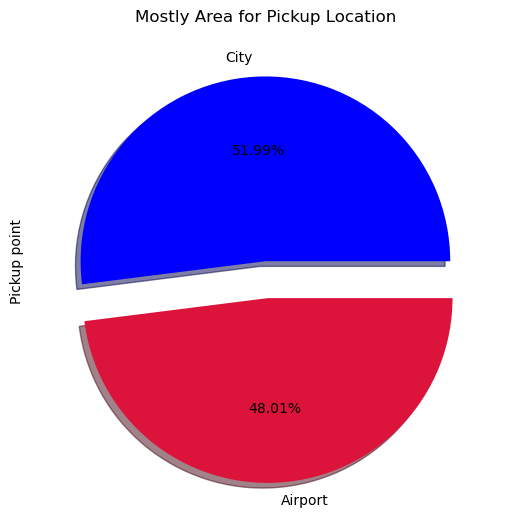

In [16]:
plt.figure(figsize=(8,6))
plt.title('Mostly Area for Pickup Location')
df['Pickup point'].value_counts().plot(kind='pie',autopct='%0.2f%%',colors=['blue','crimson'],shadow=True,
                                            explode=[0,0.2])
plt.show()

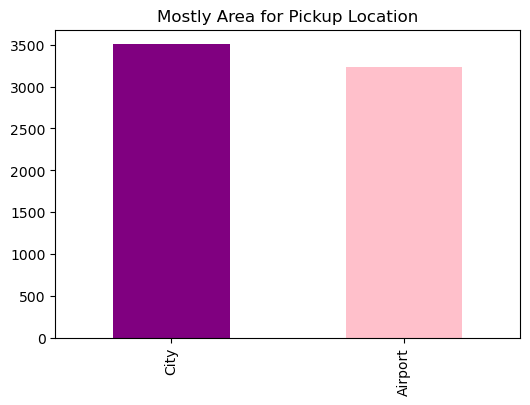

In [17]:
plt.figure(figsize=(6,4))
plt.title('Mostly Area for Pickup Location')
df['Pickup point'].value_counts().plot(kind='bar',color=['purple','pink'])
#plt.grid()
plt.show()

#### The survey seems the Trip Completed,Cancelled and No Cars Available...

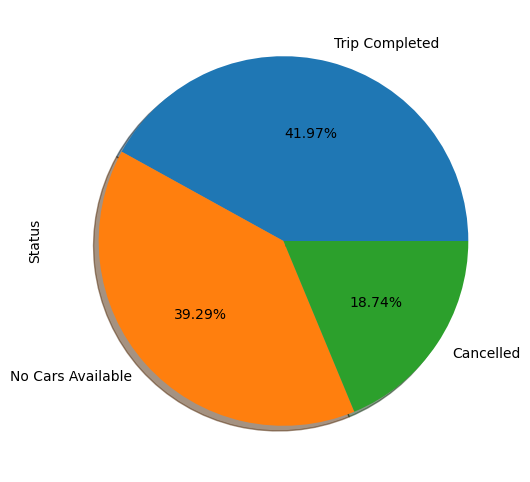

In [18]:
plt.figure(figsize=(8,6))
#plt.title('Trip Completed')
df['Status'].value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True)
plt.show()

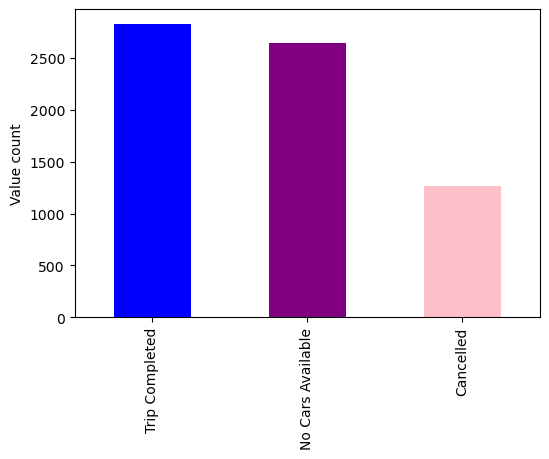

In [19]:
plt.figure(figsize=(6,4))
#plt.title('Trip Completed')
df['Status'].value_counts().plot(kind='bar',color=['blue','purple','pink'])
plt.ylabel('Value count')
#plt.grid()
plt.show()

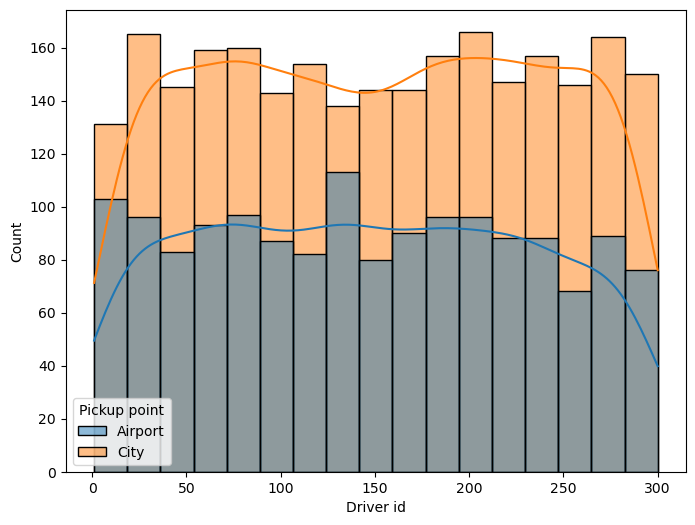

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Driver id',hue='Pickup point',kde=True)
plt.show()

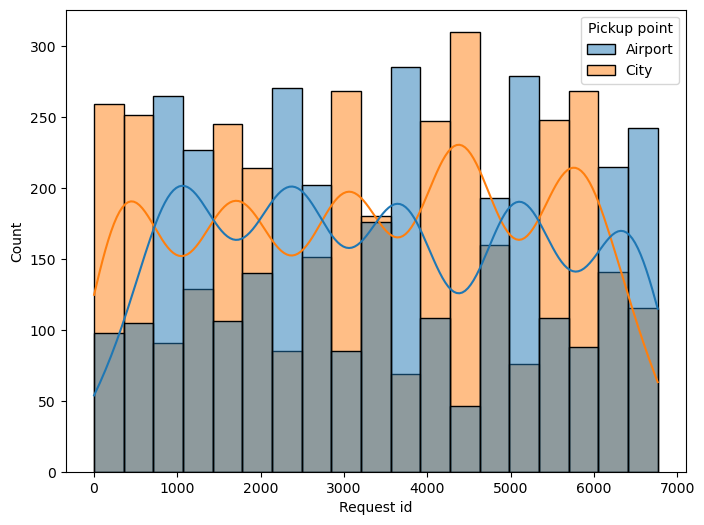

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Request id',hue='Pickup point',kde=True)
plt.show()

<AxesSubplot:>

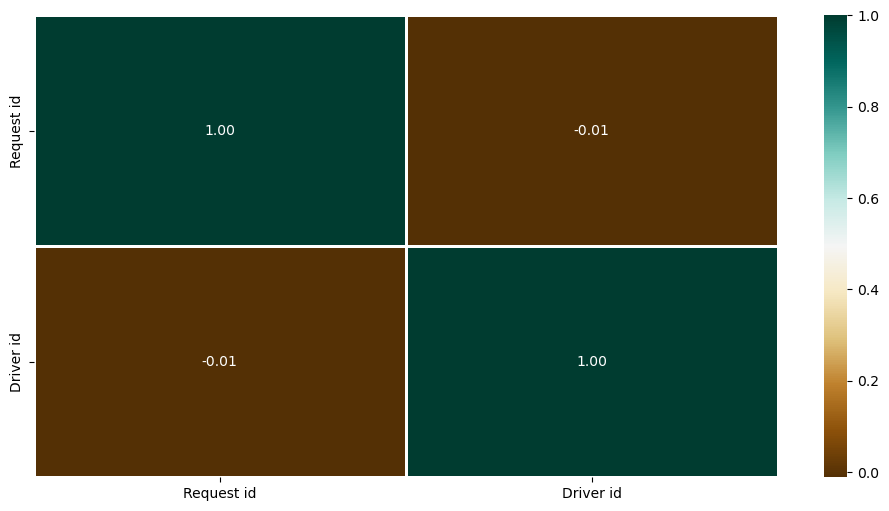

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [23]:
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00


In [24]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])

In [25]:
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp               object
dtype: object

In [26]:
df['Request timestamp_day']=df['Request timestamp'].dt.day

In [27]:
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11-07-2016 13:00,7


In [28]:
df['Request timestamp_time']=df['Request timestamp'].dt.time
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11-07-2016 13:00,7,11:51:00


In [29]:
df['Request timestamp_weekday']=df['Request timestamp'].dt.day_name()
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11-07-2016 13:00,7,11:51:00,Monday


In [30]:
df['Request timestamp_monthname']=df['Request timestamp'].dt.month_name()
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11-07-2016 13:00,7,11:51:00,Monday,November


In [31]:
df['Request timestamp_year']=df['Request timestamp'].dt.year
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11-07-2016 13:00,7,11:51:00,Monday,November,2016


In [32]:
df['Request timestamp_Hour']=df['Request timestamp'].dt.hour
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11-07-2016 13:00,7,11:51:00,Monday,November,2016,11


In [33]:
df['Request timestamp_Minutes']=df['Request timestamp'].dt.minute
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour,Request timestamp_Minutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11-07-2016 13:00,7,11:51:00,Monday,November,2016,11,51


In [34]:
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [35]:
df.dtypes

Request id                              int64
Pickup point                           object
Driver id                             float64
Status                                 object
Request timestamp              datetime64[ns]
Drop timestamp                 datetime64[ns]
Request timestamp_day                   int64
Request timestamp_time                 object
Request timestamp_weekday              object
Request timestamp_monthname            object
Request timestamp_year                  int64
Request timestamp_Hour                  int64
Request timestamp_Minutes               int64
dtype: object

In [36]:
df['Drop timestamp_day']=df['Drop timestamp'].dt.day
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour,Request timestamp_Minutes,Drop timestamp_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11:51:00,Monday,November,2016,11,51,7.0


In [37]:
df['Drop timestamp_time']=df['Drop timestamp'].dt.time
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour,Request timestamp_Minutes,Drop timestamp_day,Drop timestamp_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11:51:00,Monday,November,2016,11,51,7.0,13:00:00


In [38]:
df['Drop timestamp_dayname']=df['Drop timestamp'].dt.day_name()
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour,Request timestamp_Minutes,Drop timestamp_day,Drop timestamp_time,Drop timestamp_dayname
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11:51:00,Monday,November,2016,11,51,7.0,13:00:00,Monday


In [39]:
df['Drop timestamp_monthname']=df['Request timestamp'].dt.month_name()
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour,Request timestamp_Minutes,Drop timestamp_day,Drop timestamp_time,Drop timestamp_dayname,Drop timestamp_monthname
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11:51:00,Monday,November,2016,11,51,7.0,13:00:00,Monday,November


In [40]:
df['Drop timestamp_year']=df['Drop timestamp'].dt.year
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour,Request timestamp_Minutes,Drop timestamp_day,Drop timestamp_time,Drop timestamp_dayname,Drop timestamp_monthname,Drop timestamp_year
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11:51:00,Monday,November,2016,11,51,7.0,13:00:00,Monday,November,2016.0


In [41]:
df['Drop timestamp_hour']=df['Drop timestamp'].dt.hour
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour,Request timestamp_Minutes,Drop timestamp_day,Drop timestamp_time,Drop timestamp_dayname,Drop timestamp_monthname,Drop timestamp_year,Drop timestamp_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11:51:00,Monday,November,2016,11,51,7.0,13:00:00,Monday,November,2016.0,13.0


In [42]:
df['Drop timestamp_minutes']=df['Drop timestamp'].dt.minute
df.head(1)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_day,Request timestamp_time,Request timestamp_weekday,Request timestamp_monthname,Request timestamp_year,Request timestamp_Hour,Request timestamp_Minutes,Drop timestamp_day,Drop timestamp_time,Drop timestamp_dayname,Drop timestamp_monthname,Drop timestamp_year,Drop timestamp_hour,Drop timestamp_minutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11:51:00,Monday,November,2016,11,51,7.0,13:00:00,Monday,November,2016.0,13.0,0.0


In [43]:
df.dtypes

Request id                              int64
Pickup point                           object
Driver id                             float64
Status                                 object
Request timestamp              datetime64[ns]
Drop timestamp                 datetime64[ns]
Request timestamp_day                   int64
Request timestamp_time                 object
Request timestamp_weekday              object
Request timestamp_monthname            object
Request timestamp_year                  int64
Request timestamp_Hour                  int64
Request timestamp_Minutes               int64
Drop timestamp_day                    float64
Drop timestamp_time                    object
Drop timestamp_dayname                 object
Drop timestamp_monthname               object
Drop timestamp_year                   float64
Drop timestamp_hour                   float64
Drop timestamp_minutes                float64
dtype: object

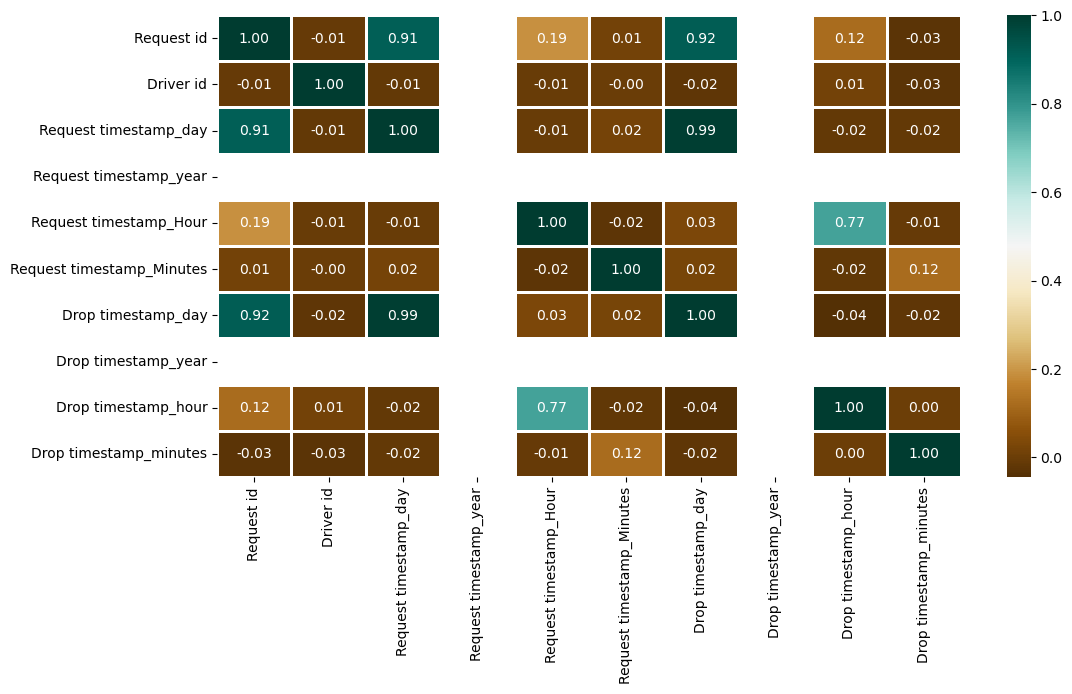

In [44]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True);

#### First up all we have to get deep knowledge about the  data.....so  distribute the data to get more clarification about it...

In [45]:
pd.DataFrame(df['Request timestamp_day'].value_counts())

,Request timestamp_day
7,2674
15,1381
14,1353
13,1337


In [46]:
pd.DataFrame(df['Request timestamp_time'].value_counts())

,Request timestamp_time
18:10:00,17
18:22:00,15
19:02:00,15
20:33:00,15
20:35:00,14
...,...
10:54:00,1
02:23:00,1
16:36:00,1
10:32:00,1


In [47]:
pd.DataFrame(df['Request timestamp_monthname'].value_counts())

,Request timestamp_monthname
July,4071
November,1367
December,1307


In [48]:
pd.DataFrame(df['Request timestamp_year'].value_counts())

,Request timestamp_year
2016,6745


In [49]:
pd.DataFrame(df['Request timestamp_Hour'].value_counts())

,Request timestamp_Hour
18,510
20,492
19,473
21,449
5,445
9,431
8,423
17,418
7,406
6,398


In [50]:
pd.DataFrame(df['Request timestamp_Minutes'].value_counts())

,Request timestamp_Minutes
10,134
13,130
35,128
52,127
33,124
40,122
42,122
22,121
48,121
29,121


#### To get the idea about the Pickup time wrto the other datas....

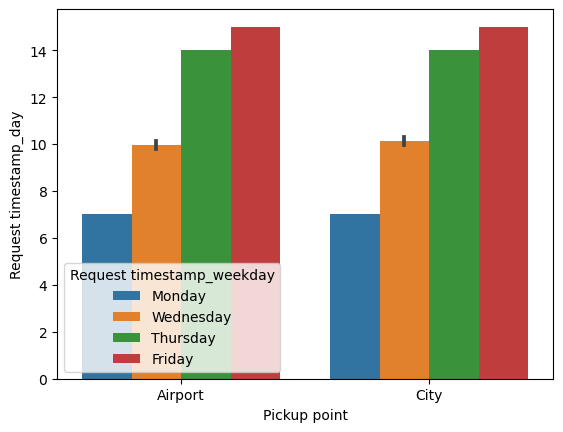

In [51]:
ax=sns.barplot(data=df,x='Pickup point', y='Request timestamp_day',hue='Request timestamp_weekday')


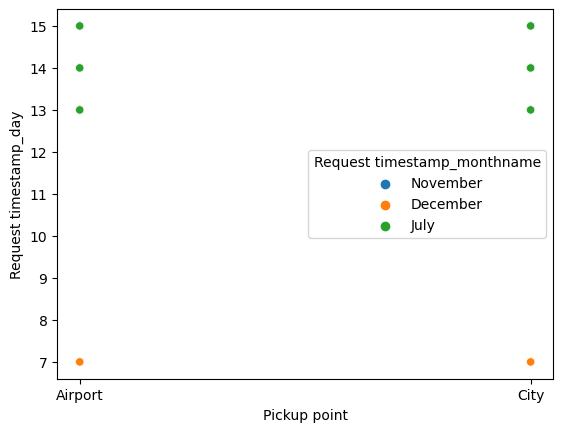

In [52]:
ax1=sns.scatterplot(data=df,x='Pickup point', y='Request timestamp_day',hue='Request timestamp_monthname')


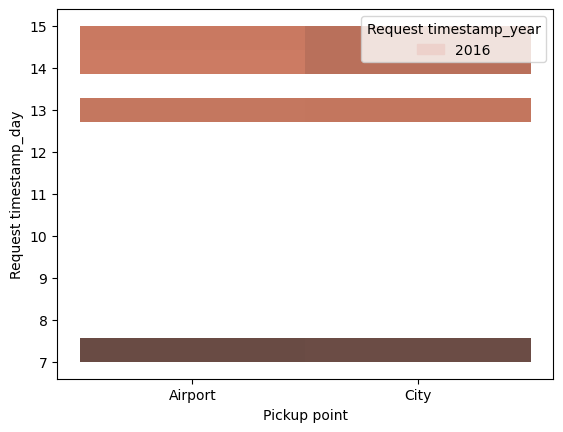

In [53]:
ax2=sns.histplot(data=df,x='Pickup point', y='Request timestamp_day',hue='Request timestamp_year')

In [ ]:
This plot show the pickup area with respect to Resqust date on basis of the days

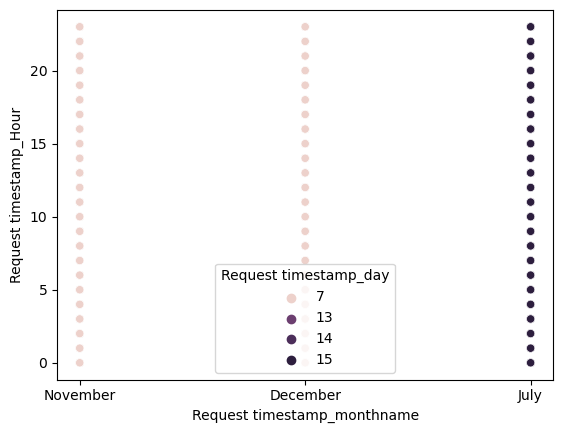

In [54]:
ax2=sns.scatterplot(data=df,x='Request timestamp_monthname', y='Request timestamp_Hour',hue='Request timestamp_day')

In [ ]:
This plot show the Request month name with respect to Request Hour on basis of the date

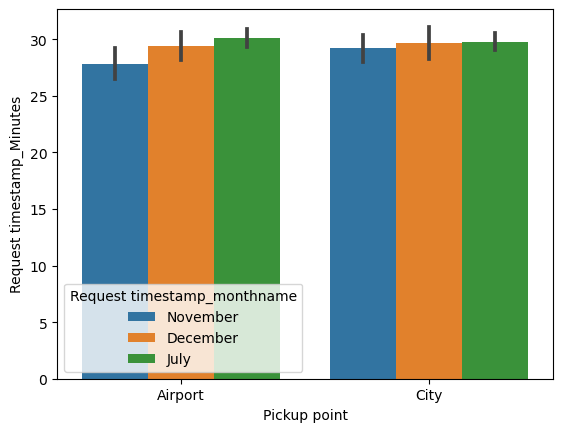

In [59]:
ax2=sns.barplot(data=df,x='Pickup point', y='Request timestamp_Minutes',hue='Request timestamp_monthname')

In [ ]:
This plot show the pickup area with respect to Request minutes on basis of the month

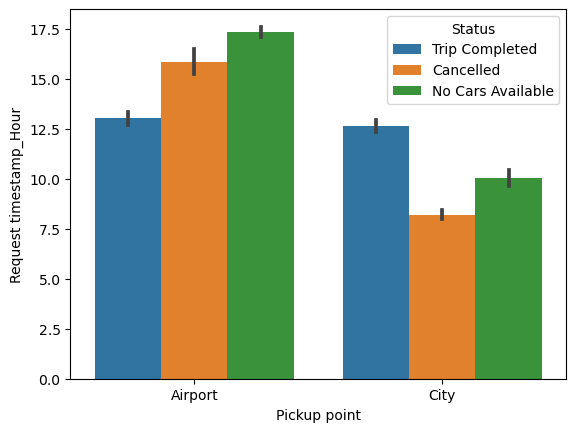

In [84]:
ax2=sns.barplot(data=df,x='Pickup point', y='Request timestamp_Hour',hue='Status')

In [ ]:
This plot show the pickup area with respect to Request hour on basis of the Status

In [ ]:
This is the date in which trips done(Date wise distribution)

<AxesSubplot:ylabel='Request timestamp_day'>

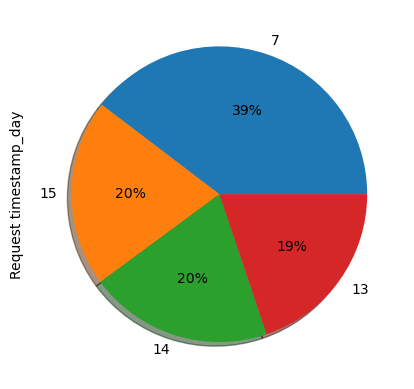

In [62]:
df['Request timestamp_day'].value_counts().plot(kind='pie',autopct='%i%%',shadow='True')

In [ ]:
This is the day in which trips done(Day wise distribution)

<AxesSubplot:ylabel='Request timestamp_weekday'>

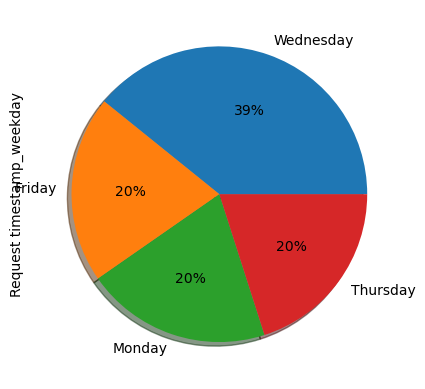

In [85]:
df['Request timestamp_weekday'].value_counts().plot(kind='pie',autopct='%i%%',shadow='True')

In [ ]:
This is the month in which trips done(Month wise distribution)

<AxesSubplot:ylabel='Request timestamp_monthname'>

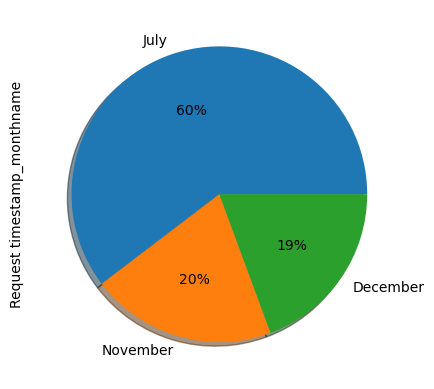

In [86]:
df['Request timestamp_monthname'].value_counts().plot(kind='pie',autopct='%i%%',shadow='True')

In [ ]:
This is the minutes in which trips done(Minutes wise distribution)

<AxesSubplot:ylabel='Request timestamp_Minutes'>

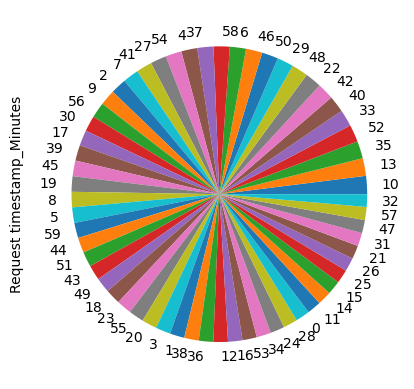

In [60]:
df['Request timestamp_Minutes'].value_counts().plot(kind='pie')#,autopct='%i%%',shadow='True')

In [ ]:
This is the Status with respect to Request minutes on the basis of month

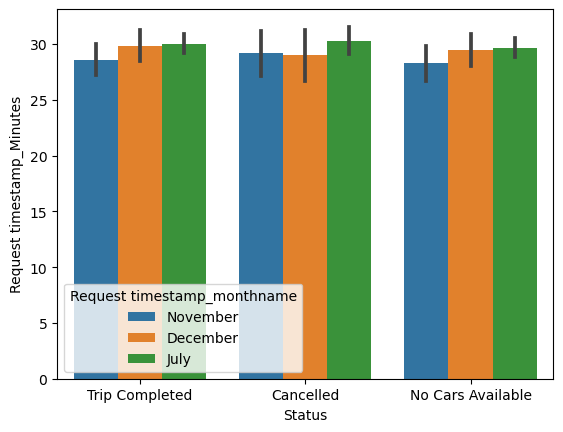

In [105]:
ax2=sns.barplot(data=df,x='Status', y='Request timestamp_Minutes',hue='Request timestamp_monthname')

In [ ]:
This is the Status with respect to Request minutes on the basis of weekday

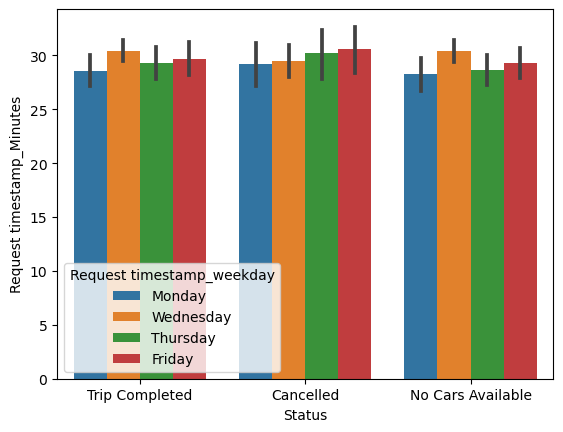

In [108]:
ax2=sns.barplot(data=df,x='Status', y='Request timestamp_Minutes',hue='Request timestamp_weekday')

In [ ]:
This is the Status with respect to Request Hours on the basis of date

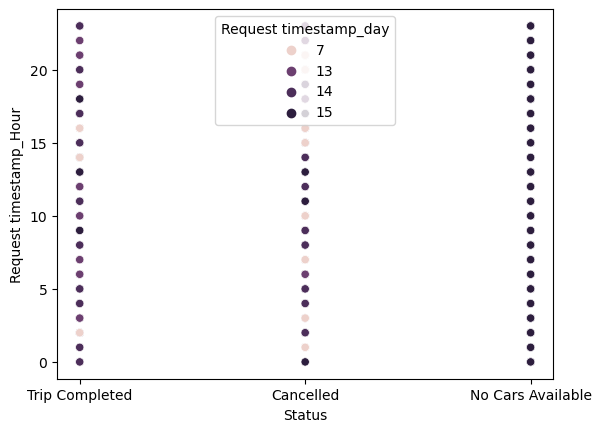

In [102]:
ax2=sns.scatterplot(data=df,x='Status', y='Request timestamp_Hour',hue='Request timestamp_day')

#### Lets us discuss about the Drop timestamp....

In [ ]:
This is the Pickup point  with respect to Drop Day on the basis of days

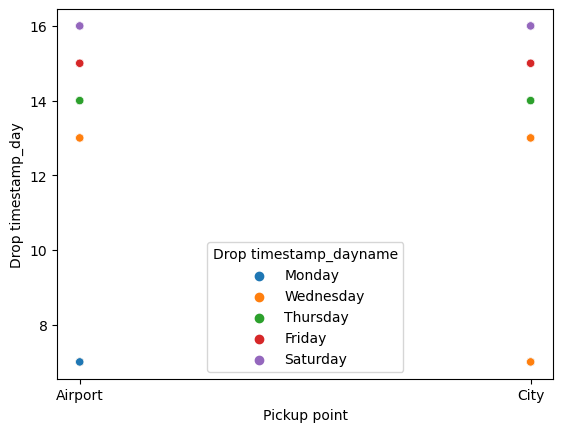

In [62]:
ax2=sns.scatterplot(data=df,x='Pickup point', y='Drop timestamp_day',hue='Drop timestamp_dayname')

In [ ]:
This is the Drop Days with respect to Drop Date on the basis of month

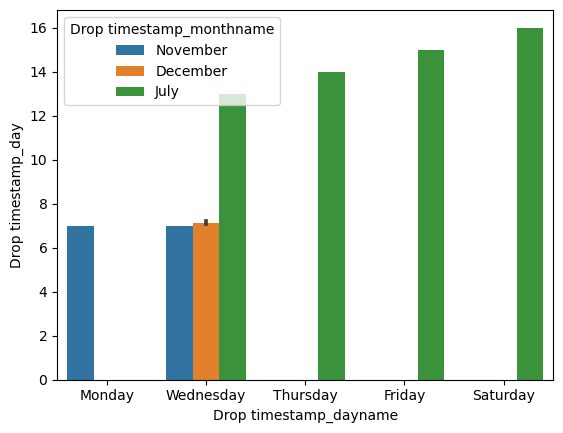

In [81]:
ax2=sns.barplot(data=df,x='Drop timestamp_dayname', y='Drop timestamp_day',hue='Drop timestamp_monthname')

In [ ]:
This is the joint plot of Drop Hour with respect to Drop Day on the basis of Drop Months

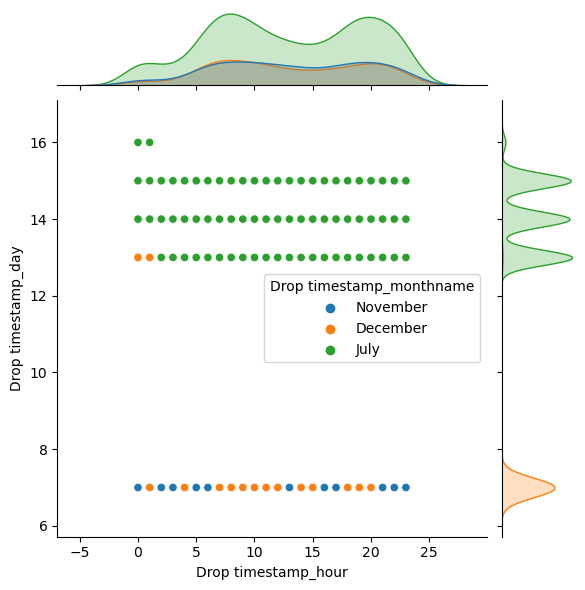

In [71]:
sns.jointplot(data=df,x='Drop timestamp_hour',y='Drop timestamp_day',hue='Drop timestamp_monthname');

In [ ]:
This is the hist plot of Request Date on the basis Drop Days 

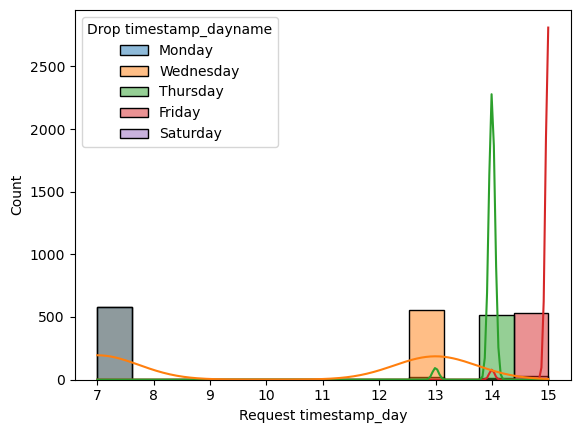

In [67]:
sns.histplot(x='Request timestamp_day', data=df, kde=True, hue='Drop timestamp_dayname')
plt.show()


In [ ]:
This is the hist plot of Drop day on the basis of Drop Months

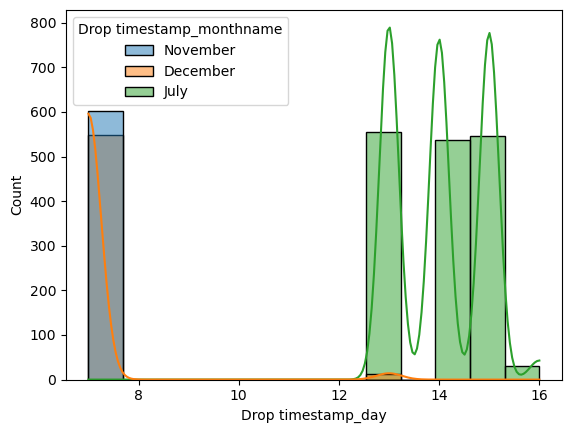

In [87]:
ax2=sns.histplot(data=df, x='Drop timestamp_day',hue='Drop timestamp_monthname',kde=True)

In [ ]:
This is the hist plot of Drop Hour on the basis of Drop days

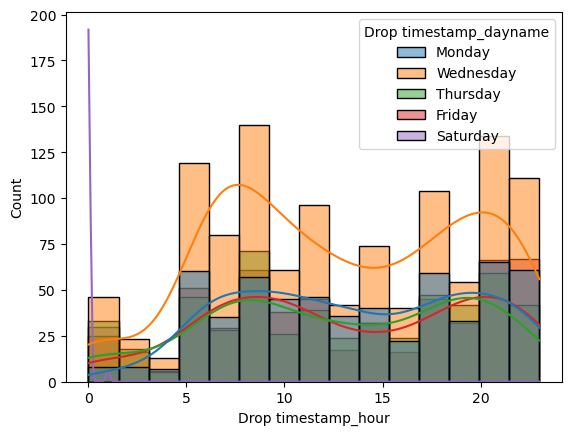

In [90]:
ax2=sns.histplot(data=df, x='Drop timestamp_hour',hue='Drop timestamp_dayname',kde=True)

In [ ]:
This is the line plot of Pickup point with respect to Drop Day on the basis of Request Months

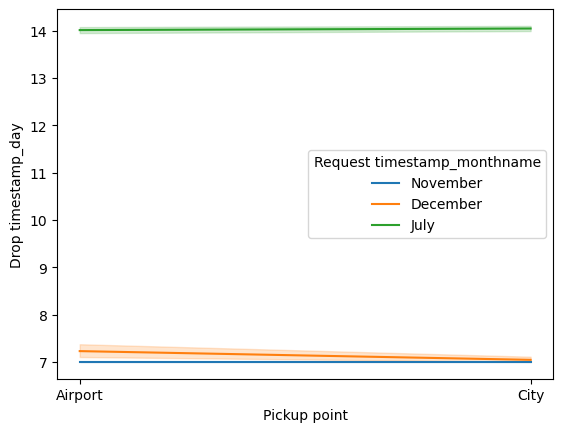

In [100]:
ax2=sns.lineplot(data=df,x='Pickup point', y='Drop timestamp_day',hue='Request timestamp_monthname')

In [ ]:
This is the Scatter plot of Pickup point with respect to Drop Day on the basis of Drop Months

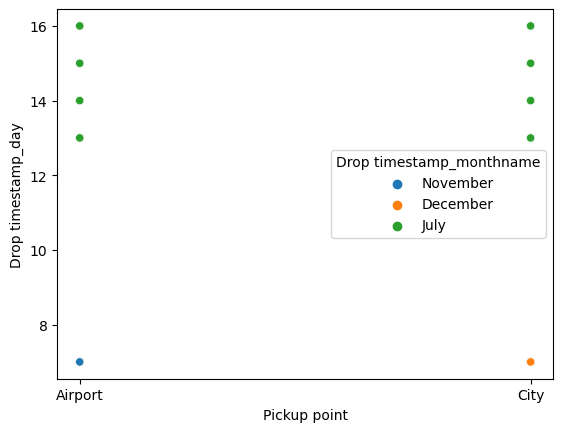

In [111]:
ax2=sns.scatterplot(data=df,x='Pickup point', y='Drop timestamp_day',hue='Drop timestamp_monthname')

In [ ]:
This is the bar plot of Pickup point with respect to Drop Hour on the basis of Request weekday

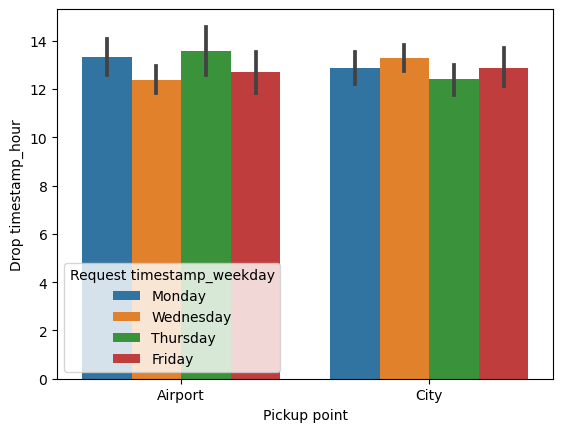

In [109]:
ax2=sns.barplot(data=df,x='Pickup point', y='Drop timestamp_hour',hue='Request timestamp_weekday')

In [ ]:
This is the scatter plot of Statuz with respect to Drop Hour on the basis of Request Weekdays

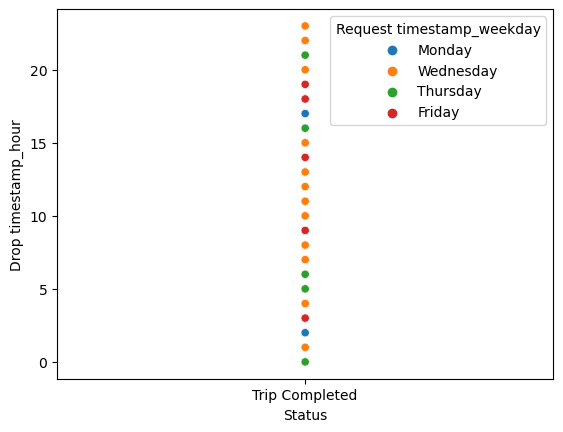

In [114]:
ax2=sns.scatterplot(data=df,x='Status', y='Drop timestamp_hour',hue='Request timestamp_weekday')

In [ ]:
This is the bar plot of Status with respect to Drop Year on the basis of Pickup point

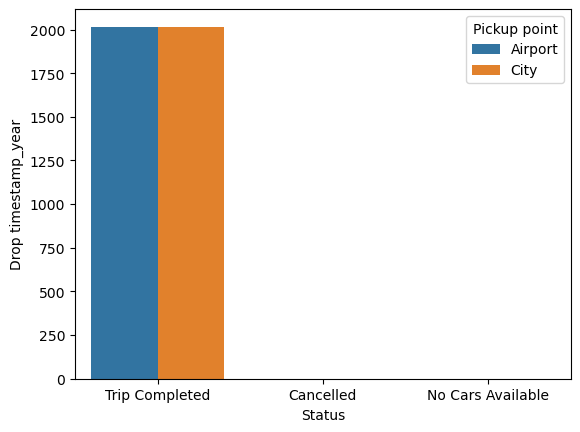

In [123]:
ax2=sns.barplot(data=df,x='Status', y='Drop timestamp_year',hue='Pickup point')

In [ ]:
This is the line plot of Pickup point with respect to Drop Hour on the basis of Drop Months

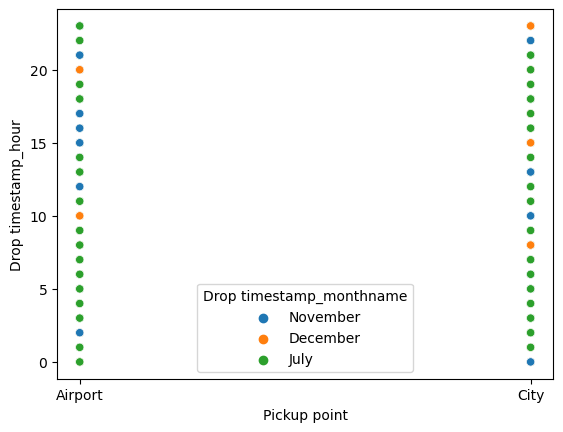

In [49]:
ax=sns.scatterplot(data=df,x='Pickup point', y='Drop timestamp_hour',hue='Drop timestamp_monthname')

In [ ]:
This is the line plot of Pickup point with respect to Drop Hour on the basis of Drop Months

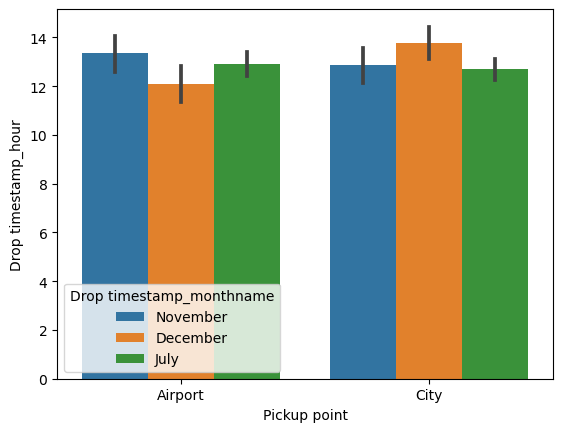

In [125]:
ax=sns.barplot(data=df,x='Pickup point', y='Drop timestamp_hour',hue='Drop timestamp_monthname')

### From this we can get the idea about the timing, the day,date,months,year according to their status ,Pick up area wrto their  Drop and Pickup time.....

For the Pick up Friday,July and 13,14,15 are the busiest day of the week and in terms of time  1 to 4 o' clock is the busiest ever....

#### The whole data are from Year 2016